In [6]:
import numpy as np
import tensorflow as tf
from numpy import linalg as LA

#important variables
n = 1000 #sample size
p = 10 #default value of p

mnist = tf.keras.datasets.mnist
(x, y),(x_test, y_test) = mnist.load_data()
dataset = x.reshape(x.shape[0],x.shape[1]**2)
np.random.shuffle(dataset)
X = dataset[:n].astype(float)

In [7]:
from numpy.linalg import inv
A = np.array([[1, 2, 3],[2, 6, -5], [3, -5, 2]])
print(A)
eigval, eigvec = LA.eig(A)
print(eigval)
print(eigvec)
eigval, eigvec = LA.eig(A.T)
print(eigval)
print(eigvec)
eigval, eigvec = LA.eig(inv(A))
print(eigval)
print(eigvec)
print(inv(A).T)
print(inv(A.T))
eigvec.T.dot(eigvec)
A = np.zeros((5,5))
eigval, eigvec = LA.eig(A)
print(eigval)
print(eigvec)

[[ 1  2  3]
 [ 2  6 -5]
 [ 3 -5  2]]
[-3.99017622  3.60491903  9.38525719]
[[-0.58564805  0.81055752  0.00358744]
 [ 0.45349221  0.33132138 -0.82738804]
 [ 0.67183419  0.48293131  0.56161924]]
[-3.99017622  3.60491903  9.38525719]
[[-0.58564805  0.81055752  0.00358744]
 [ 0.45349221  0.33132138 -0.82738804]
 [ 0.67183419  0.48293131  0.56161924]]
[-0.2506155   0.27739874  0.10655009]
[[-0.58564805  0.81055752  0.00358744]
 [ 0.45349221  0.33132138 -0.82738804]
 [ 0.67183419  0.48293131  0.56161924]]
[[ 0.0962963   0.14074074  0.20740741]
 [ 0.14074074  0.05185185 -0.08148148]
 [ 0.20740741 -0.08148148 -0.01481481]]
[[ 0.0962963   0.14074074  0.20740741]
 [ 0.14074074  0.05185185 -0.08148148]
 [ 0.20740741 -0.08148148 -0.01481481]]
[0. 0. 0. 0. 0.]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### For Loop

In [8]:
import time
#start timer
start = time.time()
#1. compute the mean vector
mu = X[0].reshape(X.shape[1],1).astype(float)
for i in range(n-1):
    mu = mu + X[i+1].reshape(X.shape[1],1).astype(float)
mu = mu/n
#2. center the data
XC = np.empty(X.shape, dtype = float)
for i in range(n):
    XC[i] = X[i] - mu.T
# 3. compute the covariance matrix
cov = XC[0].reshape(X.shape[1],1).dot(XC[0].reshape(X.shape[1],1).T)
for i in range(n-1):
    cov = cov + XC[i+1].reshape(X.shape[1],1).dot(XC[i+1].reshape(X.shape[1],1).T)
cov = cov/n

#endtimer
end = time.time()
print(end - start)

# 4. compute the eigenvalues λi and eigenvectors φi of Σ.
lamda, phi = LA.eig(cov)
#5. order the eigenvalues by decreasing value
pos = np.argsort(lamda)
lamda[lamda.shape[0]-1-np.arange(lamda.shape[0])] = lamda[pos]
phi[:,phi.shape[0]-1-np.arange(phi.shape[0])] = phi[pos]
#6. create the matrix Φp with the p surviving eigenvectors as columns. 
phiP = (phi[:,:p])
lamdaP = lamda[:p]

0.8391258716583252


### Vectorization

In [9]:
import time

#start timer
start = time.time()
#1. compute the mean vector
X_v = X.T.astype(float)
one = np.ones((n,1), dtype = float)
mu = X_v.dot(one).astype(float)/n
#2. center the data
XC = np.empty(X.shape, dtype = float)
for i in range(n):
    XC[i] = X[i].astype(float) - mu.T
XC = XC.T
print(XC.shape)
# 3. compute the covariance matrix
cov = XC.dot(XC.T)/n

#endtimer
end = time.time()
print(end - start)

# 4. compute the eigenvalues λi and eigenvectors φi of Σ.
lamda, phi = LA.eig(cov)
#5. order the eigenvalues by decreasing value
pos = np.argsort(lamda)
lamda[lamda.shape[0]-1-np.arange(lamda.shape[0])] = lamda[pos]
phi[:,phi.shape[0]-1-np.arange(phi.shape[0])] = phi[pos]
#6. create the matrix Φp with the p surviving eigenvectors as columns. 
phiP = (phi[:,:p])
lamdaP = lamda[:p]

(784, 1000)
0.028963804244995117


### Vectorization

In [10]:
import time

#start timer
start = time.time()

X_v = X.T.astype(float)
one = np.ones((n,1))
cov = X_v.dot((np.identity(n) - one.dot(one.T)/n)).dot(X_v.T)/n

#endtimer
end = time.time()
print(end - start)

# 4. compute the eigenvalues λi and eigenvectors φi of Σ.
lamda, phi = LA.eig(cov)
#5. order the eigenvalues by decreasing value
pos = np.argsort(lamda)
lamda[lamda.shape[0]-1-np.arange(lamda.shape[0])] = lamda[pos]
phi[:,phi.shape[0]-1-np.arange(phi.shape[0])] = phi[:,pos]
#6. create the matrix Φp with the p surviving eigenvectors as columns. 
phiP = (phi[:,:p])
lamdaP = lamda[:p]

0.04459404945373535


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


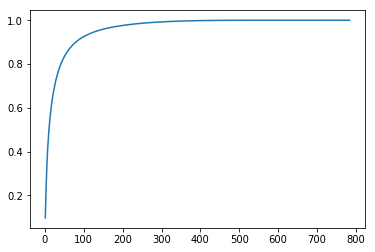

In [11]:
import matplotlib
import matplotlib.pyplot as plt
d = X.shape[1]

lamda, phi = LA.eig(cov)
#sort lamda and phi
pos = np.argsort(lamda)
lamda[lamda.shape[0]-1-np.arange(lamda.shape[0])] = lamda[pos]
phi[:,phi.shape[0]-1-np.arange(phi.shape[0])] = phi[:,pos]

k = np.arange(d)+1
r = np.empty((d,), dtype = float)
for i in range(d):
    r[i] = np.sum(lamda[:(i+1)])
r = r/np.sum(lamda[:d])

plt.plot(k,r)
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


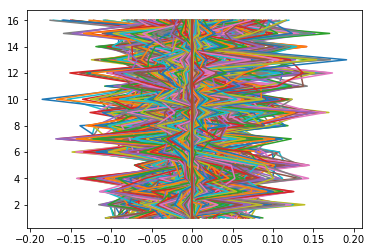

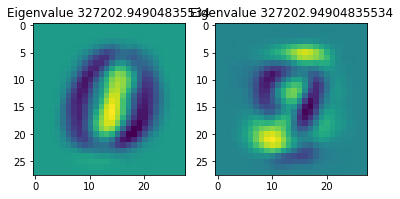

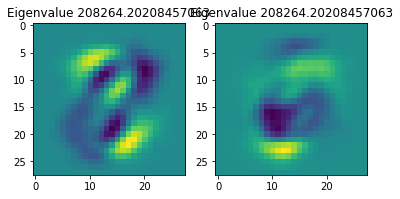

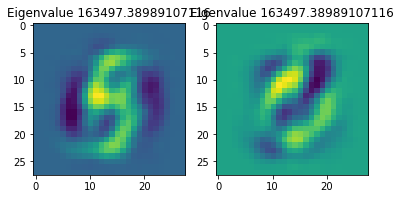

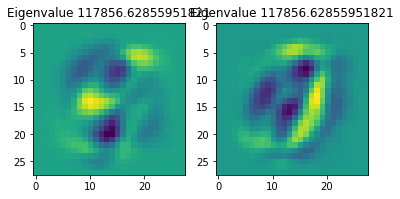

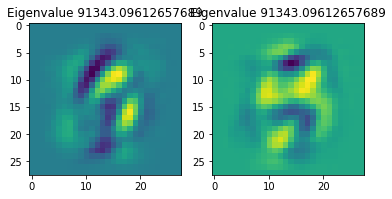

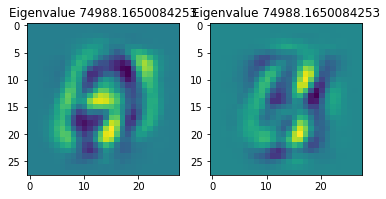

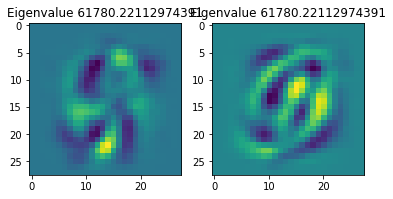

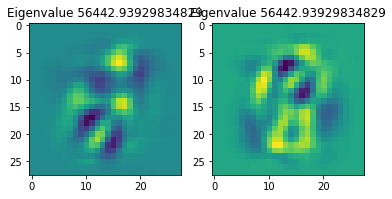

In [12]:
import matplotlib.image as img
phi_i = phi[:,:16].T
x = np.arange(16)+1
plt.plot(phi_i,x)
plt.show()
for i in range(8):
    figure, axes = plt.subplots(1, 2)
    axes[0].imshow(np.real(phi[:,i*2+0].reshape(28,28)))
    axes[0].set_title('Eigenvalue '+ str(np.real(lamda[i*2+0])))
    axes[1].imshow(np.real(phi[:,i*2+1].reshape(28,28)))
    axes[1].set_title('Eigenvalue '+ str(np.real(lamda[i*2+0])))
    plt.show()

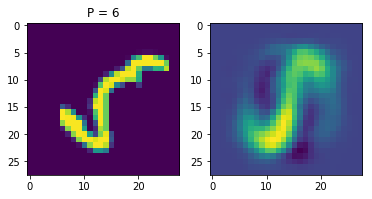

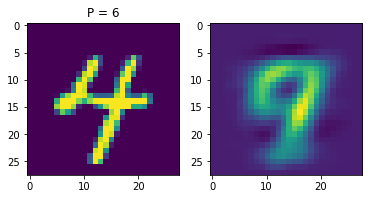

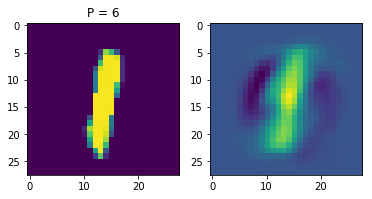

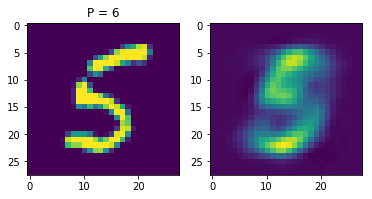

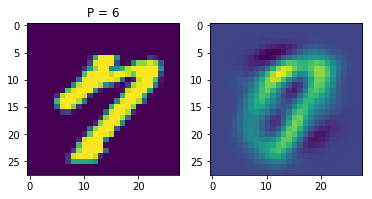

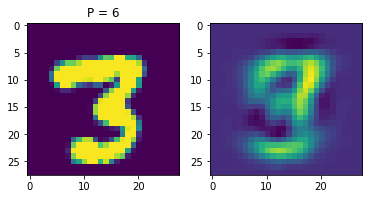

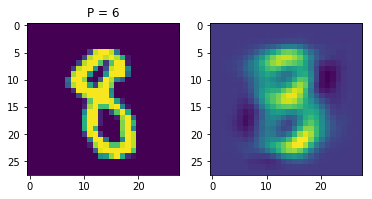

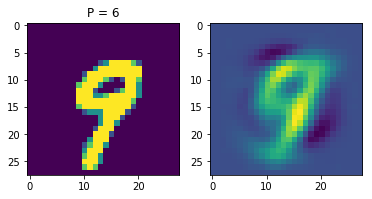

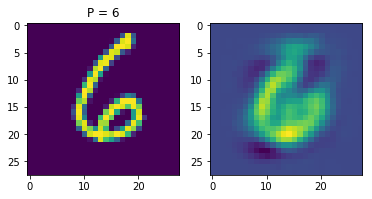

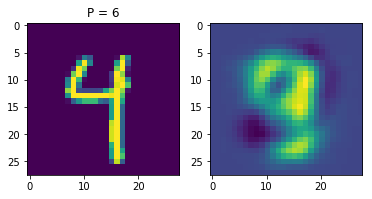

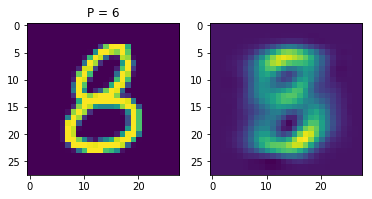

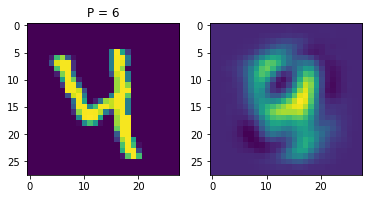

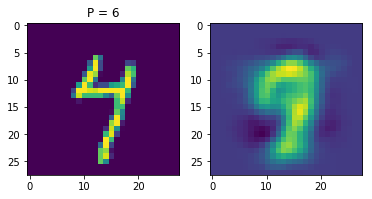

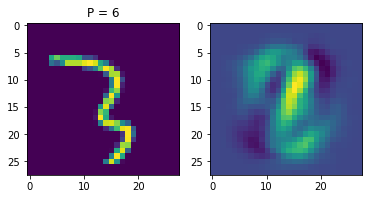

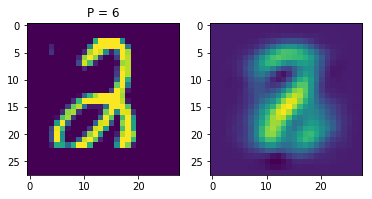

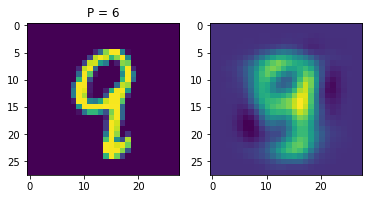

In [13]:
th = 0.4
for i in range(d):
    if(r[i]>th):
        r_th = r[i]
        p = i
        break;
phi_p = phi[:,:p]
data = X.copy()
np.random.shuffle(data)
data = data[:16]
X_C = data.T - mu.dot(np.ones((1,16)))
X_prime = phi_p.T.dot(X_C)
X_r = phi_p.dot(X_prime) + mu.dot(np.ones((1,16)))

for i in range(16):
    figure, axes = plt.subplots(1,2)
    axes[0].imshow(data[i].reshape(28,28))
    axes[1].imshow(np.real(X_r[:,i].reshape(28,28)))
    axes[0].set_title('P = ' + str(p))
    plt.show()

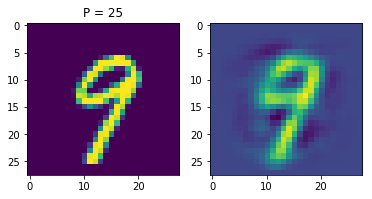

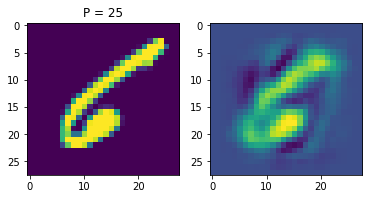

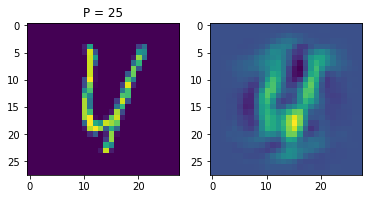

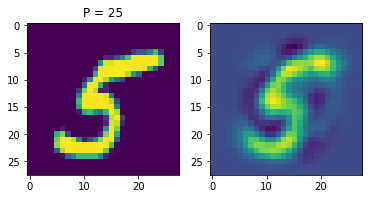

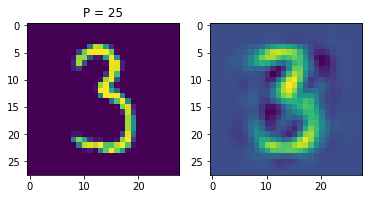

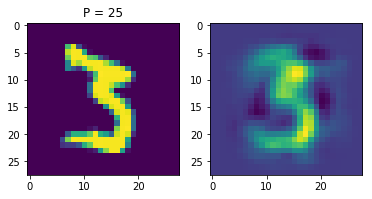

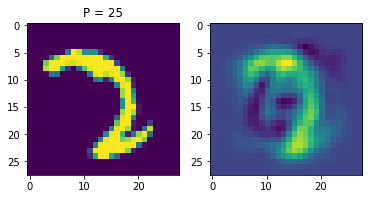

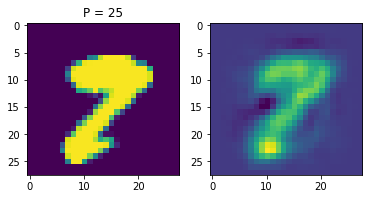

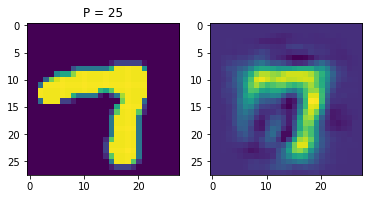

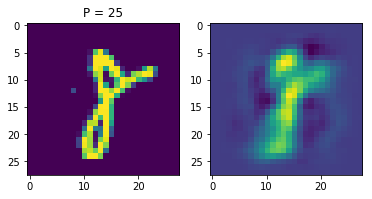

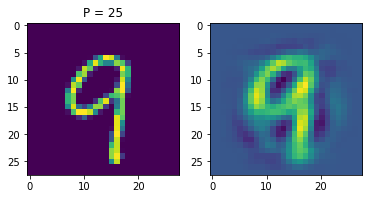

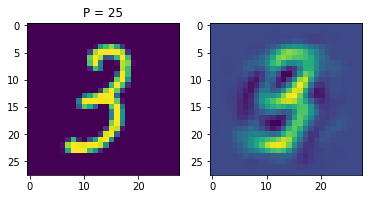

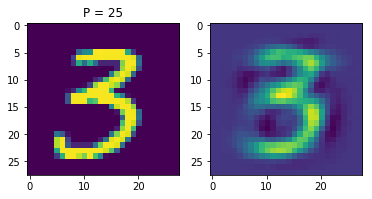

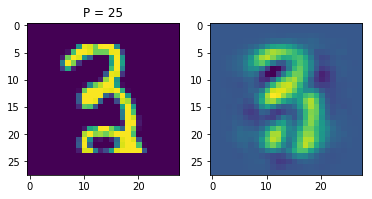

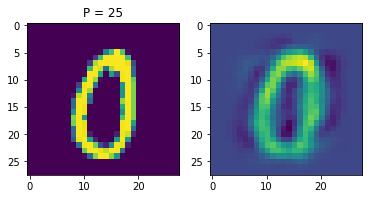

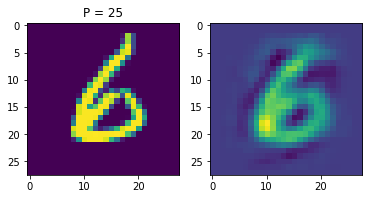

In [14]:
th = 0.7
for i in range(d):
    if(r[i]>th):
        r_th = r[i]
        p = i
        break;
phi_p = phi[:,:p]
data = X.copy()
np.random.shuffle(data)
data = data[:16]
X_C = data.T - mu.dot(np.ones((1,16)))
X_prime = phi_p.T.dot(X_C)
X_r = phi_p.dot(X_prime) + mu.dot(np.ones((1,16)))

for i in range(16):
    figure, axes = plt.subplots(1,2)
    axes[0].imshow(data[i].reshape(28,28))
    axes[1].imshow(np.real(X_r[:,i].reshape(28,28)))
    axes[0].set_title('P = ' + str(p))
    plt.show()

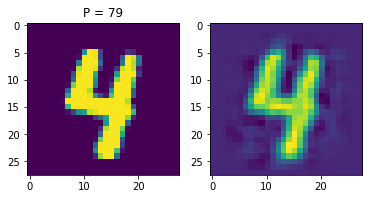

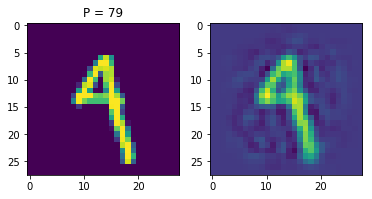

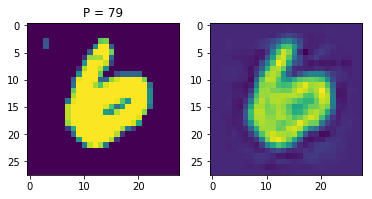

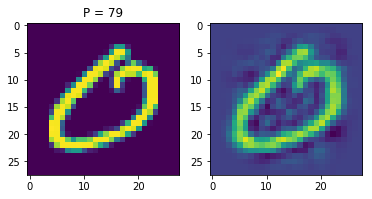

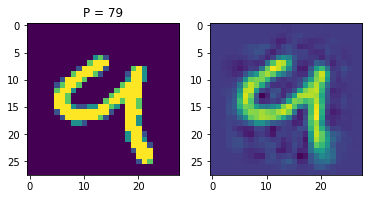

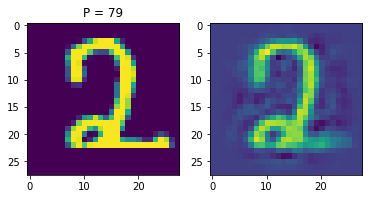

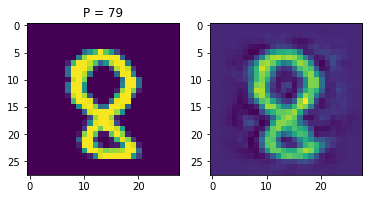

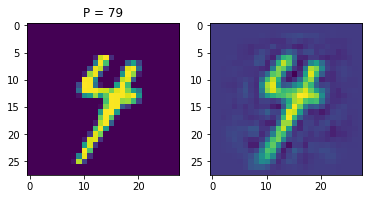

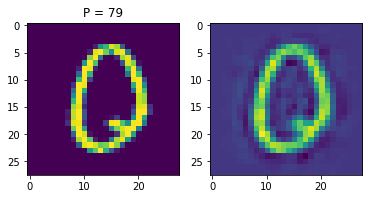

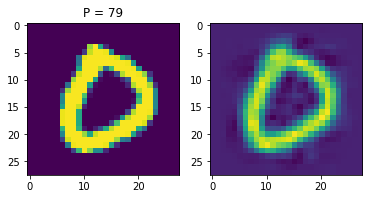

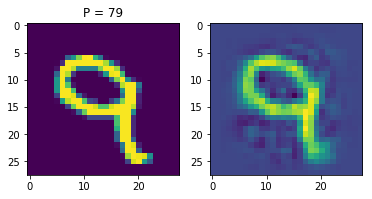

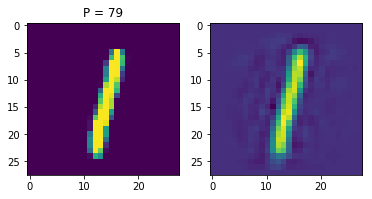

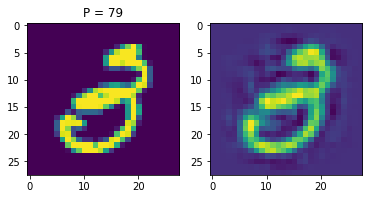

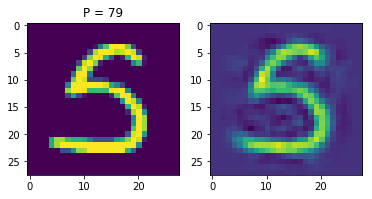

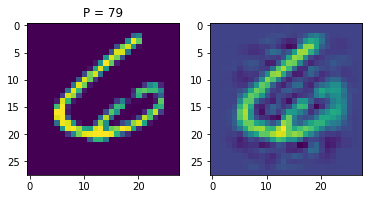

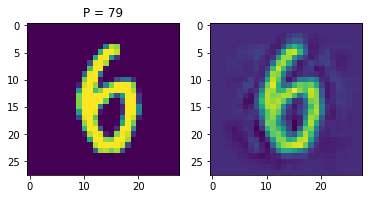

In [15]:
th = 0.9
for i in range(d):
    if(r[i]>th):
        r_th = r[i]
        p = i
        break;
phi_p = phi[:,:p]
data = X.copy()
np.random.shuffle(data)
data = data[:16]
X_C = data.T - mu.dot(np.ones((1,16)))
X_prime = phi_p.T.dot(X_C)
X_r = phi_p.dot(X_prime) + mu.dot(np.ones((1,16)))

for i in range(16):
    figure, axes = plt.subplots(1,2)
    axes[0].imshow(data[i].reshape(28,28))
    axes[1].imshow(np.real(X_r[:,i].reshape(28,28)))
    axes[0].set_title('P = ' + str(p))
    plt.show()